In [1]:
def experiment(X, y):
    # 1. Получение важности из Sklearn и rfpimp (Возвращает (Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, _, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    # 2. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    # 3. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    # 4. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 5. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')

    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn RandomForest(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R randomForest (MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R Ranger (Modified MDI)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RandomForestSRC (Modified MDA)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party cforest (MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit (MDA)')

    picture(importance_series_list, titles_list)
    return importance_series_list

In [2]:
import pandas as pd

table = pd.read_csv('all_feature_importances_combined.csv')
table.columns

Index(['Unnamed: 0', 'Sklearn_RandomForest_EXP1', 'Rfpimp_EXP1',
       'R_randomForest_EXP1', 'R_Ranger_EXP1', 'RandomForestSRC_EXP1',
       'Party_cforest_EXP1', 'Partykit_EXP1', 'Sklearn_RandomForest_EXP2',
       'Rfpimp_EXP2', 'R_randomForest_EXP2', 'R_Ranger_EXP2',
       'RandomForestSRC_EXP2', 'Party_cforest_EXP2', 'Partykit_EXP2',
       'Sklearn_RandomForest_EXP3', 'Rfpimp_EXP3', 'R_randomForest_EXP3',
       'R_Ranger_EXP3', 'RandomForestSRC_EXP3', 'Party_cforest_EXP3',
       'Partykit_EXP3', 'Sklearn_RandomForest_EXP4', 'Rfpimp_EXP4',
       'R_randomForest_EXP4', 'R_Ranger_EXP4', 'RandomForestSRC_EXP4',
       'Party_cforest_EXP4', 'Partykit_EXP4'],
      dtype='object')

In [3]:
importance_series = []
importance_series.append(table['Sklearn_RandomForest_EXP2'])
importance_series.append(table['Rfpimp_EXP2'])
importance_series.append(table['R_randomForest_EXP2'])
importance_series.append(table['R_Ranger_EXP2'])
importance_series.append(table['RandomForestSRC_EXP2'])
importance_series.append(table['Party_cforest_EXP2'])
importance_series.append(table['Partykit_EXP2'])

In [4]:
importance_series

[0     0.363731
 1     0.140403
 2     0.144763
 3     0.140834
 4     0.028475
 5     0.061760
 6     0.059275
 7     0.052835
 8     0.007923
 9          NaN
 10         NaN
 11         NaN
 12         NaN
 Name: Sklearn_RandomForest_EXP2, dtype: float64,
 0     0.131950
 1     0.031022
 2     0.030434
 3     0.082671
 4     0.006160
 5     0.008976
 6     0.007193
 7     0.007923
 8     0.001317
 9          NaN
 10         NaN
 11         NaN
 12         NaN
 Name: Rfpimp_EXP2, dtype: float64,
 0     3621.319533
 1     2184.959928
 2     2244.814521
 3      981.705387
 4      224.306357
 5     1746.651454
 6     1747.535231
 7     1484.246151
 8      167.753444
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 Name: R_randomForest_EXP2, dtype: float64,
 0     1281.063991
 1      270.525711
 2      272.508015
 3      464.766317
 4      135.182254
 5       -1.201051
 6       -2.040596
 7        0.038288
 8       -2.100804
 9             NaN
 10            Na

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


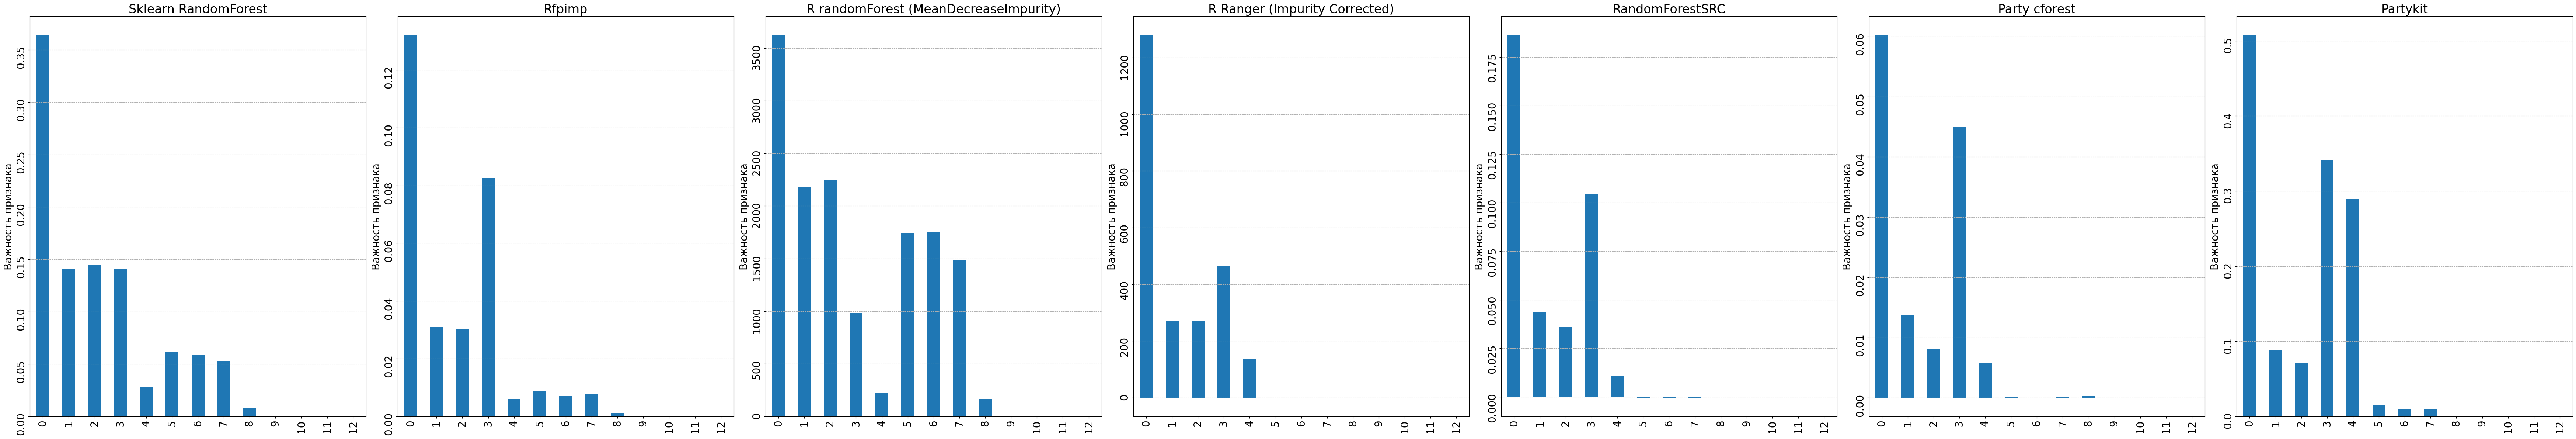

In [5]:
from importance_lib.pic import picture

raw_lists = [
    importance_series
]

titles_list = ['Sklearn RandomForest', 'Rfpimp', 'R randomForest (MeanDecreaseImpurity)',
               'R Ranger (Impurity Corrected)', 'RandomForestSRC', 'Party cforest', 'Partykit']

for i in raw_lists:
    picture(i, titles_list)


<font size="6">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<font size="6">Source features.</font>

[I 2025-12-20 12:47:12,353] A new study created in memory with name: no-name-0a65b7b8-00bb-4a89-bf79-8d30662f349f
[I 2025-12-20 12:47:14,227] Trial 0 finished with value: 0.6975198573512725 and parameters: {'n_estimators': 115, 'max_depth': 6, 'min_samples_leaf': 15, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6975198573512725.
[I 2025-12-20 12:47:14,714] Trial 1 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 38, 'max_depth': 1, 'min_samples_leaf': 13, 'max_features': 0.5}. Best is trial 0 with value: 0.6975198573512725.
[I 2025-12-20 12:47:16,066] Trial 2 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 120, 'max_depth': 2, 'min_samples_leaf': 11, 'max_features': 0.5}. Best is trial 0 with value: 0.6975198573512725.
[I 2025-12-20 12:47:17,093] Trial 3 finished with value: 0.6981277354514508 and parameters: {'n_estimators': 86, 'max_depth': 2, 'min_samples_leaf': 10, 'max_features': 1.0}. Best is trial 3 with valu

{'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 1.0}
best_params: {'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 1.0}
the importance of sklearn: price        0.388607
longitude    0.236127
latitude     0.235915
bedrooms     0.123489
bathrooms    0.015862
dtype: float64
the importance of rfpimp: price        0.194116
bedrooms     0.129579
longitude    0.069440
latitude     0.060423
bathrooms    0.005329
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        3927.854595
longitude    2683.583238
latitude     2634.279879
bedrooms     1028.996863
bathrooms     174.228115
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Successfully computed variable importance for CLASSIFICATION
the import

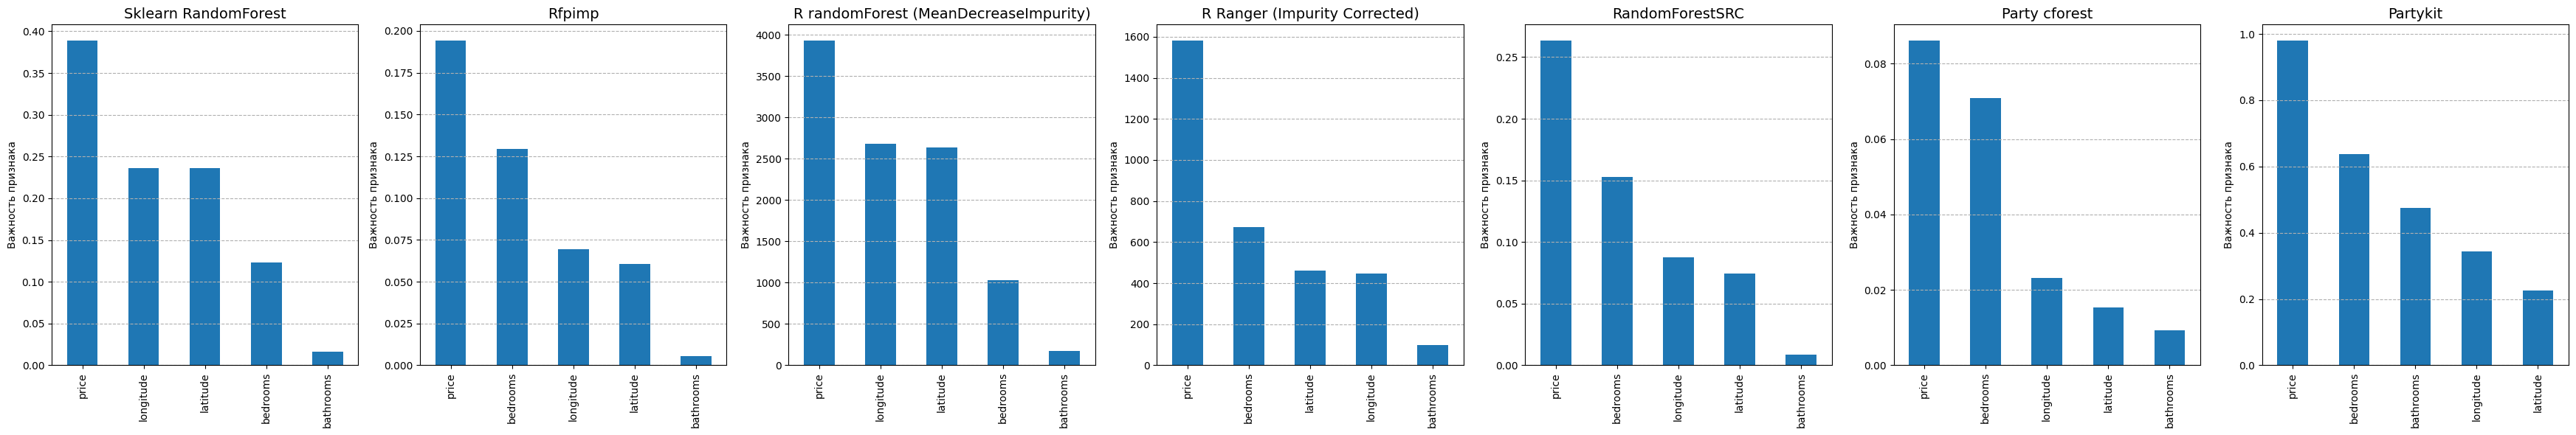

In [3]:
importance_series_list_1 = experiment(X, y)

In [4]:
importance_series_list_1

[price        0.388607
 longitude    0.236127
 latitude     0.235915
 bedrooms     0.123489
 bathrooms    0.015862
 dtype: float64,
 price        0.194116
 bedrooms     0.129579
 longitude    0.069440
 latitude     0.060423
 bathrooms    0.005329
 dtype: float64,
 price        3927.854595
 longitude    2683.583238
 latitude     2634.279879
 bedrooms     1028.996863
 bathrooms     174.228115
 dtype: float64,
 price        1580.566842
 bedrooms      671.354995
 latitude      461.398046
 longitude     447.140281
 bathrooms      99.969522
 dtype: float64,
 price        0.263203
 bedrooms     0.152746
 longitude    0.087290
 latitude     0.074398
 bathrooms    0.008573
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.086067
 bedrooms     0.070901
 longitude    0.023158
 latitude     0.015338
 bathrooms    0.009276
 Name: party_cforest_importance, dtype: float64,
 price        0.979259
 bedrooms     0.637897
 bathrooms    0.475153
 longitude    0.342947
 latitude     0.225200
 Na

<font size="6">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [5]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2025-12-20 13:12:45,803] A new study created in memory with name: no-name-d4737256-b761-4270-b548-031d8a7d1516
[I 2025-12-20 13:12:48,372] Trial 0 finished with value: 0.70319338628627 and parameters: {'n_estimators': 83, 'max_depth': 6, 'min_samples_leaf': 14, 'max_features': 0.7}. Best is trial 0 with value: 0.70319338628627.
[I 2025-12-20 13:12:49,682] Trial 1 finished with value: 0.6981479980547901 and parameters: {'n_estimators': 65, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 0.7}. Best is trial 0 with value: 0.70319338628627.
[I 2025-12-20 13:12:51,071] Trial 2 finished with value: 0.7072661695574648 and parameters: {'n_estimators': 45, 'max_depth': 9, 'min_samples_leaf': 14, 'max_features': 0.5}. Best is trial 2 with value: 0.7072661695574648.
[I 2025-12-20 13:12:52,793] Trial 3 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 120, 'max_depth': 1, 'min_samples_leaf': 16, 'max_features': 0.7}. Best is trial 2 with value: 0.7072661695574648.


{'n_estimators': 121, 'max_depth': 13, 'min_samples_leaf': 14, 'max_features': 0.5}
best_params: {'n_estimators': 121, 'max_depth': 13, 'min_samples_leaf': 14, 'max_features': 0.5}
the importance of sklearn: price             0.363731
latitude          0.144763
bedrooms          0.140834
longitude         0.140403
random_normal     0.061760
random_uniform    0.059275
random_int        0.052835
bathrooms         0.028475
random_binary     0.007923
dtype: float64
the importance of rfpimp: price             0.131950
bedrooms          0.082671
longitude         0.031022
latitude          0.030434
random_normal     0.008976
random_int        0.007923
random_uniform    0.007193
bathrooms         0.006160
random_binary     0.001317
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random_uniform + random_normal + random_int + random_binary
Importance matrix shape: (9, 1)
Successfully computed variable importance
the importance

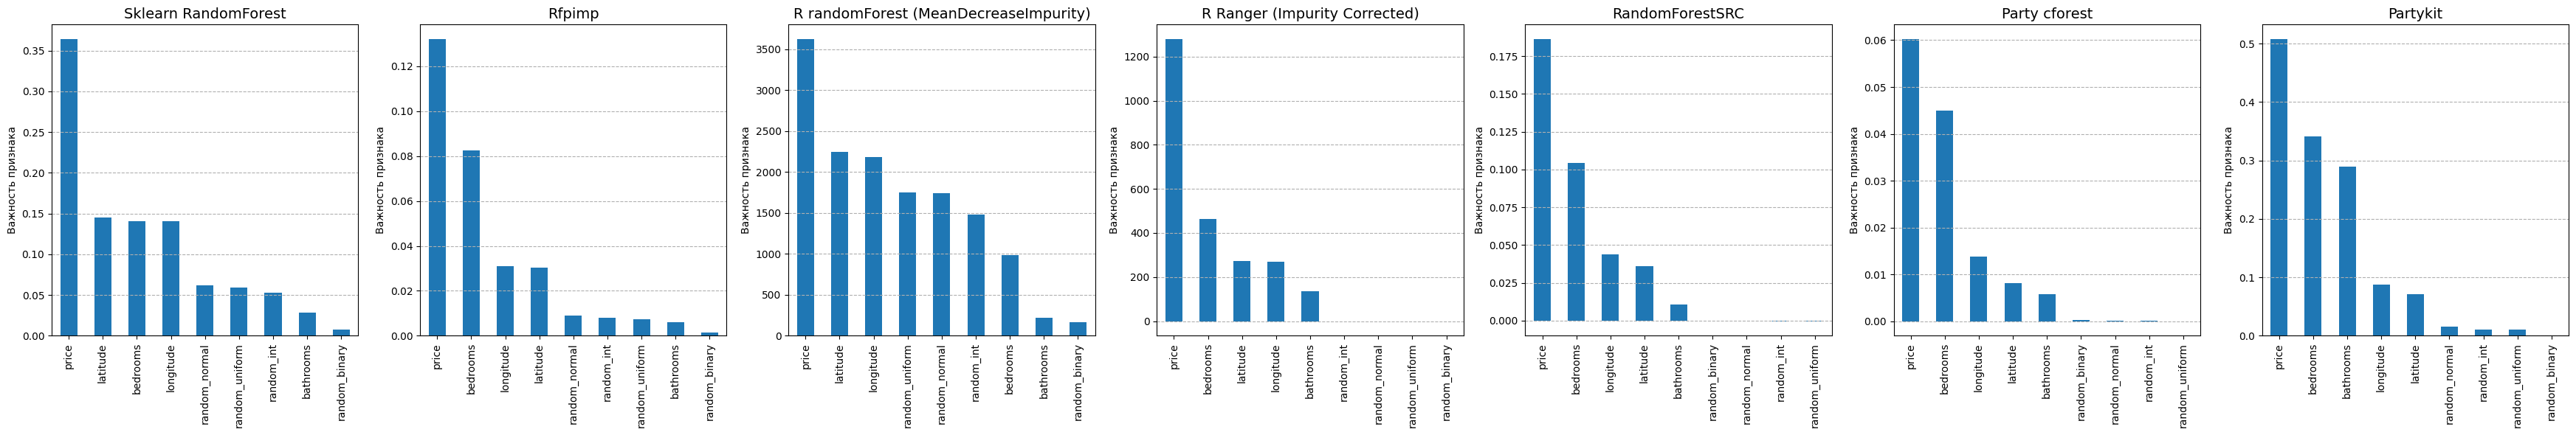

In [6]:
importance_series_list_2 = experiment(X, y)

In [7]:
importance_series_list_2

[price             0.363731
 latitude          0.144763
 bedrooms          0.140834
 longitude         0.140403
 random_normal     0.061760
 random_uniform    0.059275
 random_int        0.052835
 bathrooms         0.028475
 random_binary     0.007923
 dtype: float64,
 price             0.131950
 bedrooms          0.082671
 longitude         0.031022
 latitude          0.030434
 random_normal     0.008976
 random_int        0.007923
 random_uniform    0.007193
 bathrooms         0.006160
 random_binary     0.001317
 dtype: float64,
 price             3621.319533
 latitude          2244.814521
 longitude         2184.959928
 random_uniform    1747.535231
 random_normal     1746.651454
 random_int        1484.246151
 bedrooms           981.705387
 bathrooms          224.306357
 random_binary      167.753444
 dtype: float64,
 price             1281.063991
 bedrooms           464.766317
 latitude           272.508015
 longitude          270.525711
 bathrooms          135.182254
 random_int

<font size="6">Source features + copy of the 'price' feature.</font>

In [34]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2025-12-20 16:59:50,758] A new study created in memory with name: no-name-bda0ef50-8816-461d-a669-5082edbbdedc
[I 2025-12-20 16:59:53,153] Trial 0 finished with value: 0.6948654563138272 and parameters: {'n_estimators': 118, 'max_depth': 2, 'min_samples_leaf': 7, 'max_features': 0.25}. Best is trial 0 with value: 0.6948654563138272.
[I 2025-12-20 16:59:55,872] Trial 1 finished with value: 0.6979251094180581 and parameters: {'n_estimators': 149, 'max_depth': 2, 'min_samples_leaf': 3, 'max_features': 0.5}. Best is trial 1 with value: 0.6979251094180581.
[I 2025-12-20 16:59:58,067] Trial 2 finished with value: 0.6981885232614686 and parameters: {'n_estimators': 115, 'max_depth': 2, 'min_samples_leaf': 6, 'max_features': 0.7}. Best is trial 2 with value: 0.6981885232614686.
[I 2025-12-20 16:59:59,069] Trial 3 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 54, 'max_depth': 1, 'min_samples_leaf': 20, 'max_features': 0.25}. Best is trial 2 with value: 0.6981885232

{'n_estimators': 113, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 1.0}
best_params: {'n_estimators': 113, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 1.0}
the importance of sklearn: latitude     0.246865
longitude    0.245596
bedrooms     0.113462
price1       0.096500
price        0.096198
price3       0.092991
price2       0.092959
bathrooms    0.015429
dtype: float64
the importance of rfpimp: bedrooms     0.143986
longitude    0.079227
latitude     0.068305
price        0.029705
price1       0.028388
price3       0.027132
price2       0.023444
bathrooms    0.005917
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)
Successfully computed variable importance
the importance of  R_randomForest: longitude    3564.799039
latitude     3493.428123
price3       1263.794143
price2       1204.161681
price        1192.415328
price1       1164.104128


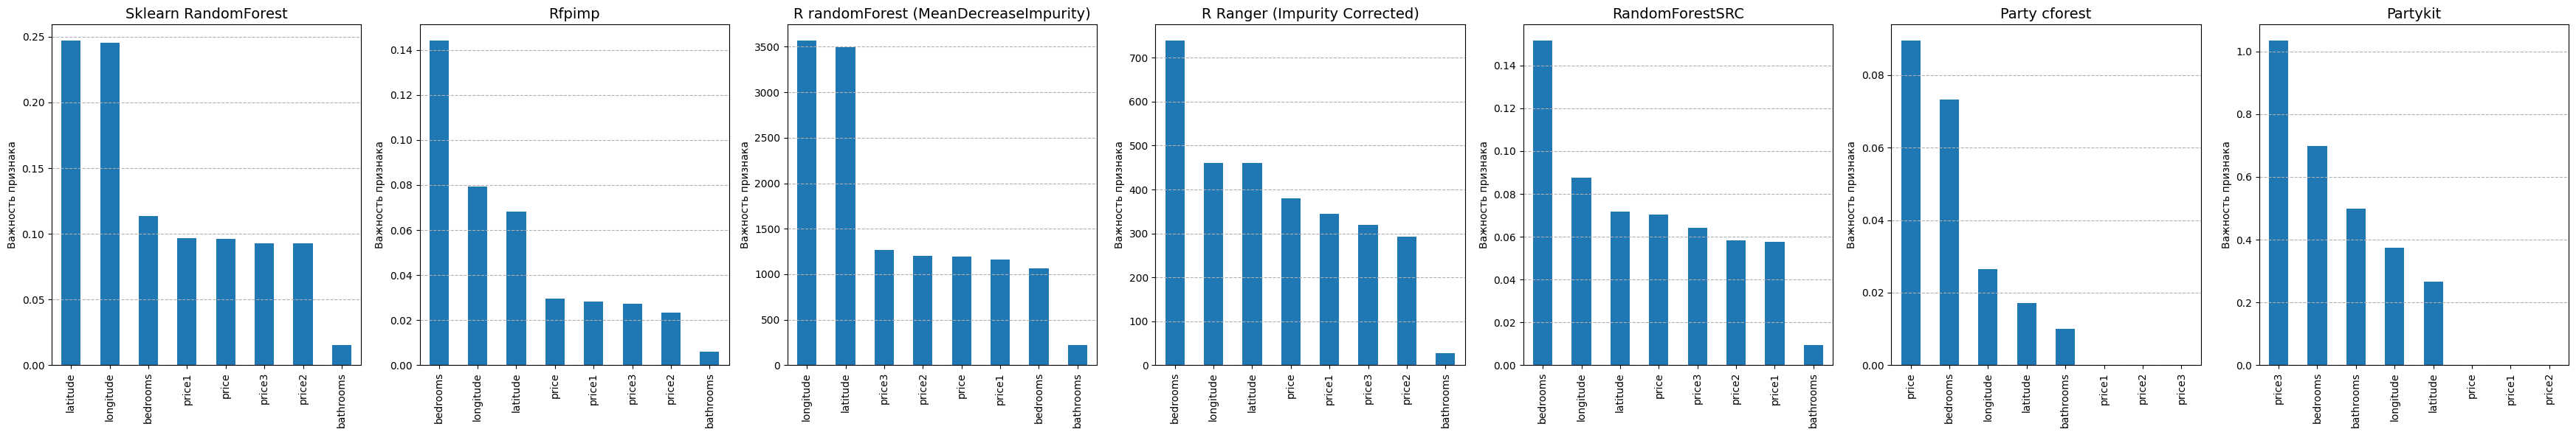

In [36]:
importance_series_list_3 = experiment(X, y)

In [37]:
importance_series_list_3

[latitude     0.246865
 longitude    0.245596
 bedrooms     0.113462
 price1       0.096500
 price        0.096198
 price3       0.092991
 price2       0.092959
 bathrooms    0.015429
 dtype: float64,
 bedrooms     0.143986
 longitude    0.079227
 latitude     0.068305
 price        0.029705
 price1       0.028388
 price3       0.027132
 price2       0.023444
 bathrooms    0.005917
 dtype: float64,
 longitude    3564.799039
 latitude     3493.428123
 price3       1263.794143
 price2       1204.161681
 price        1192.415328
 price1       1164.104128
 bedrooms     1064.746244
 bathrooms     218.639316
 dtype: float64,
 bedrooms     738.415340
 longitude    460.886282
 latitude     460.308237
 price        379.133830
 price1       344.435931
 price3       319.838937
 price2       292.505318
 bathrooms     27.554968
 dtype: float64,
 bedrooms     0.151515
 longitude    0.087562
 latitude     0.071851
 price        0.070321
 price3       0.064319
 price2       0.058420
 price1       0.05

<font size="6">Initial features + random feature random.</font>

In [11]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2025-12-20 14:44:25,056] A new study created in memory with name: no-name-5a8d016d-0d7a-4054-a304-25e24dfd17e8
[I 2025-12-20 14:44:25,437] Trial 0 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 45, 'max_depth': 2, 'min_samples_leaf': 13, 'max_features': 0.25}. Best is trial 0 with value: 0.6946830928837737.
[I 2025-12-20 14:44:26,502] Trial 1 finished with value: 0.6946830928837737 and parameters: {'n_estimators': 131, 'max_depth': 2, 'min_samples_leaf': 11, 'max_features': 0.5}. Best is trial 0 with value: 0.6946830928837737.
[I 2025-12-20 14:44:27,531] Trial 2 finished with value: 0.7032339114929486 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 0.7}. Best is trial 2 with value: 0.7032339114929486.
[I 2025-12-20 14:44:28,123] Trial 3 finished with value: 0.7000324201653428 and parameters: {'n_estimators': 49, 'max_depth': 4, 'min_samples_leaf': 16, 'max_features': 0.7}. Best is trial 2 with value: 0.70323391149

{'n_estimators': 98, 'max_depth': 15, 'min_samples_leaf': 18, 'max_features': 0.7}
best_params: {'n_estimators': 98, 'max_depth': 15, 'min_samples_leaf': 18, 'max_features': 0.7}
the importance of sklearn: price        0.373549
latitude     0.190529
longitude    0.185263
bedrooms     0.134227
random       0.097314
bathrooms    0.019118
dtype: float64
the importance of rfpimp: price        0.163843
bedrooms     0.108689
longitude    0.046260
latitude     0.044071
random       0.012218
bathrooms    0.006099
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        3912.591283
latitude     2769.701092
longitude    2719.758259
random       2491.222490
bedrooms     1033.952911
bathrooms     212.055050
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + 

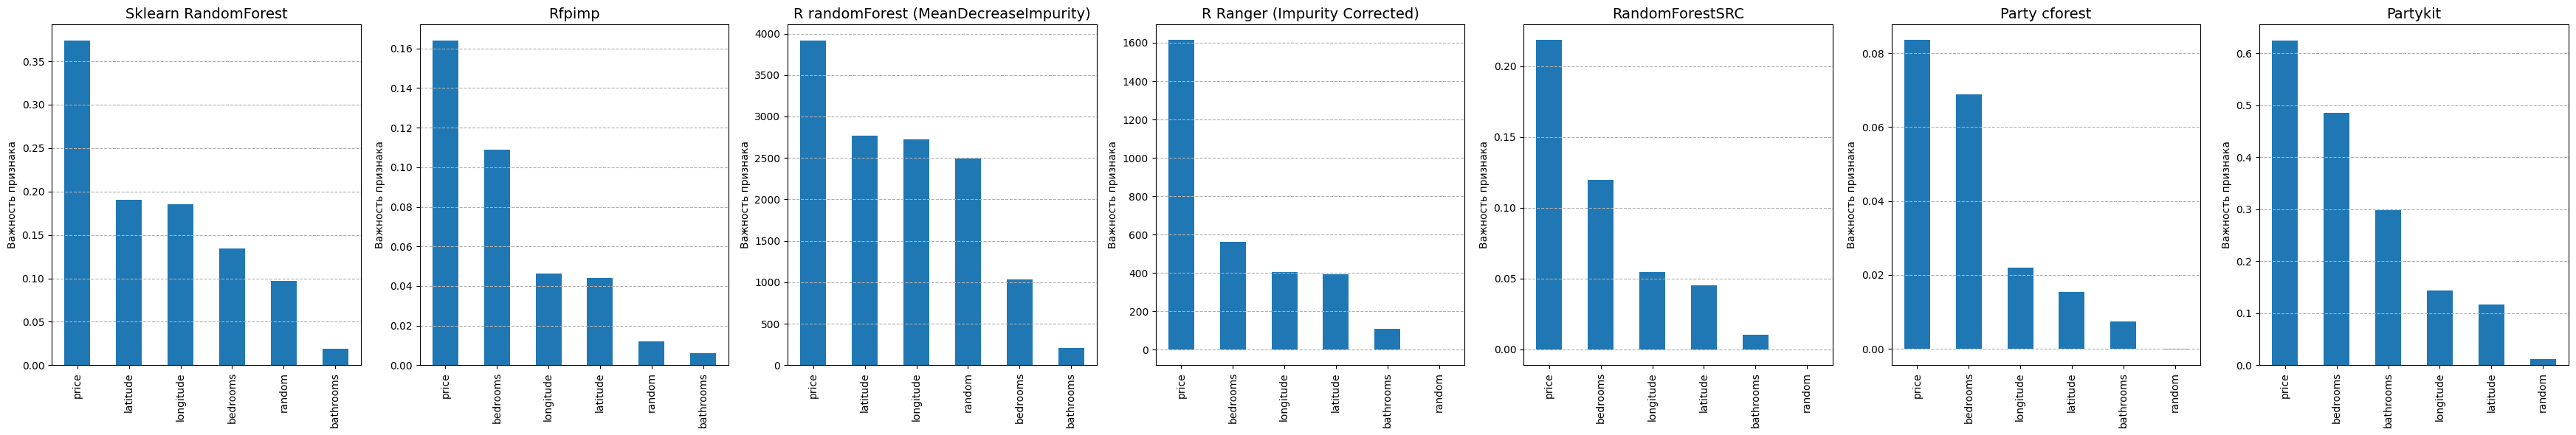

In [12]:
importance_series_list_4 = experiment(X, y)

In [13]:
importance_series_list_4

[price        0.373549
 latitude     0.190529
 longitude    0.185263
 bedrooms     0.134227
 random       0.097314
 bathrooms    0.019118
 dtype: float64,
 price        0.163843
 bedrooms     0.108689
 longitude    0.046260
 latitude     0.044071
 random       0.012218
 bathrooms    0.006099
 dtype: float64,
 price        3912.591283
 latitude     2769.701092
 longitude    2719.758259
 random       2491.222490
 bedrooms     1033.952911
 bathrooms     212.055050
 dtype: float64,
 price        1613.933818
 bedrooms      562.767799
 longitude     404.474122
 latitude      393.877820
 bathrooms     108.843040
 random         -0.439521
 dtype: float64,
 price        0.218474
 bedrooms     0.119631
 longitude    0.054395
 latitude     0.045184
 bathrooms    0.010042
 random      -0.000419
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.083575
 bedrooms     0.068809
 longitude    0.022021
 latitude     0.015411
 bathrooms    0.007424
 random      -0.000264
 Name: party_cforest_im

<font size="6">Rendering all cases.</font>

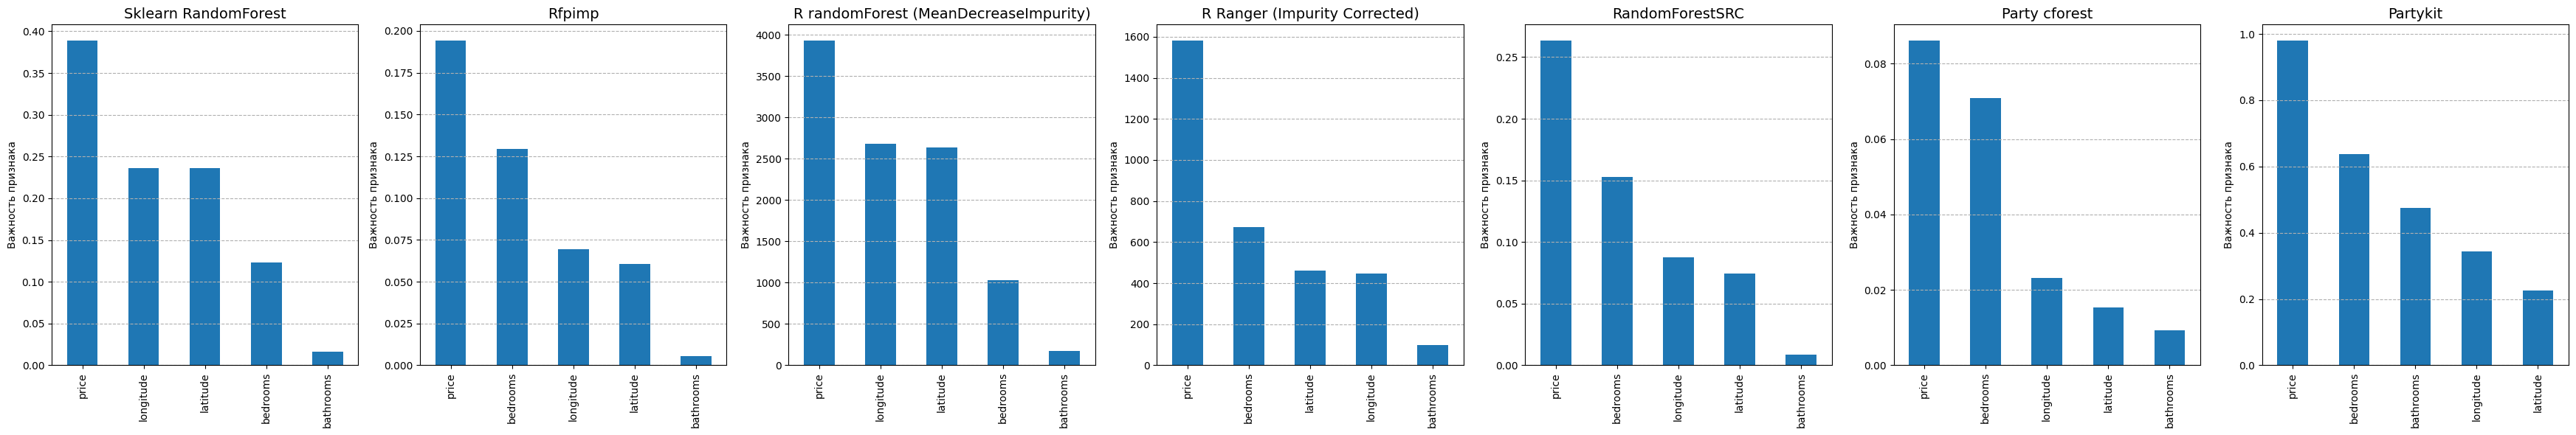

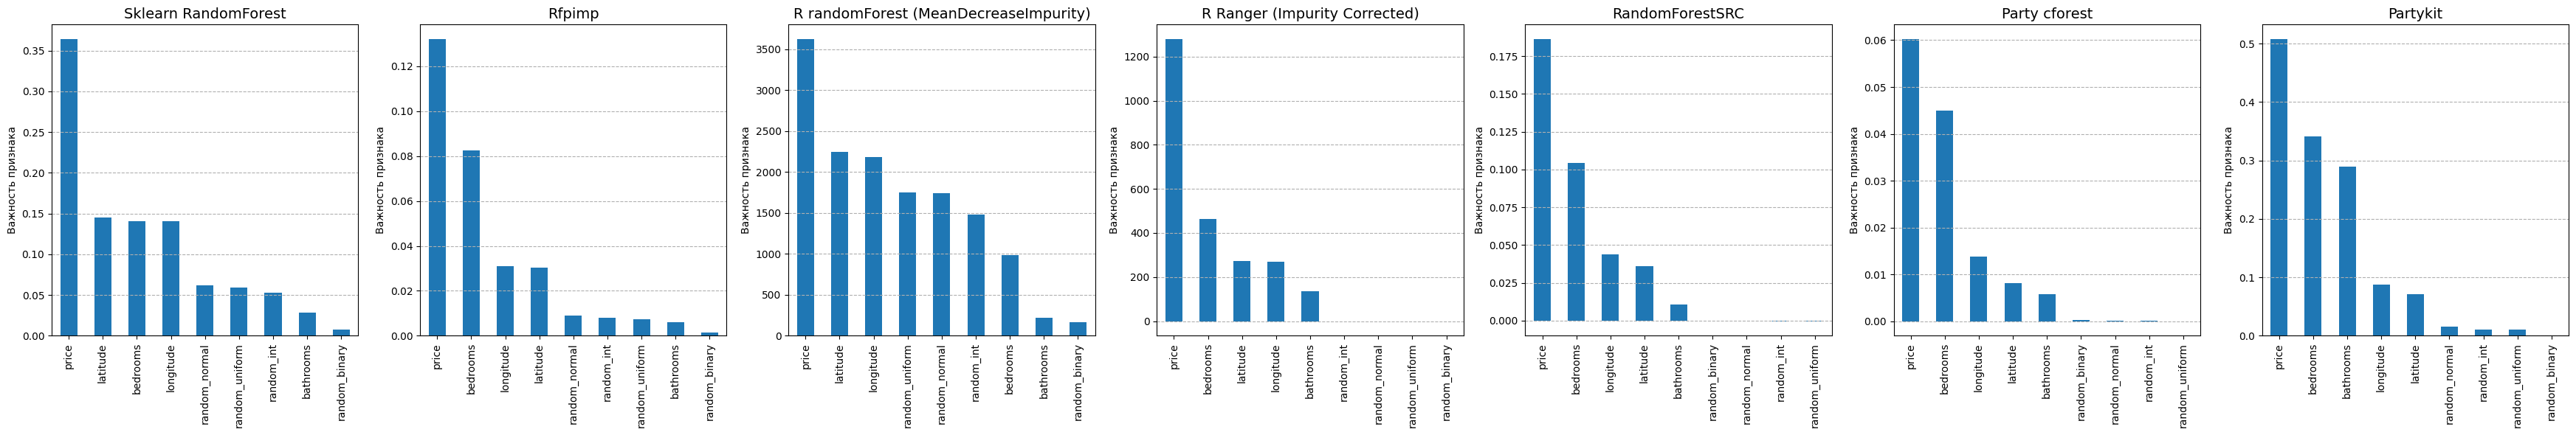

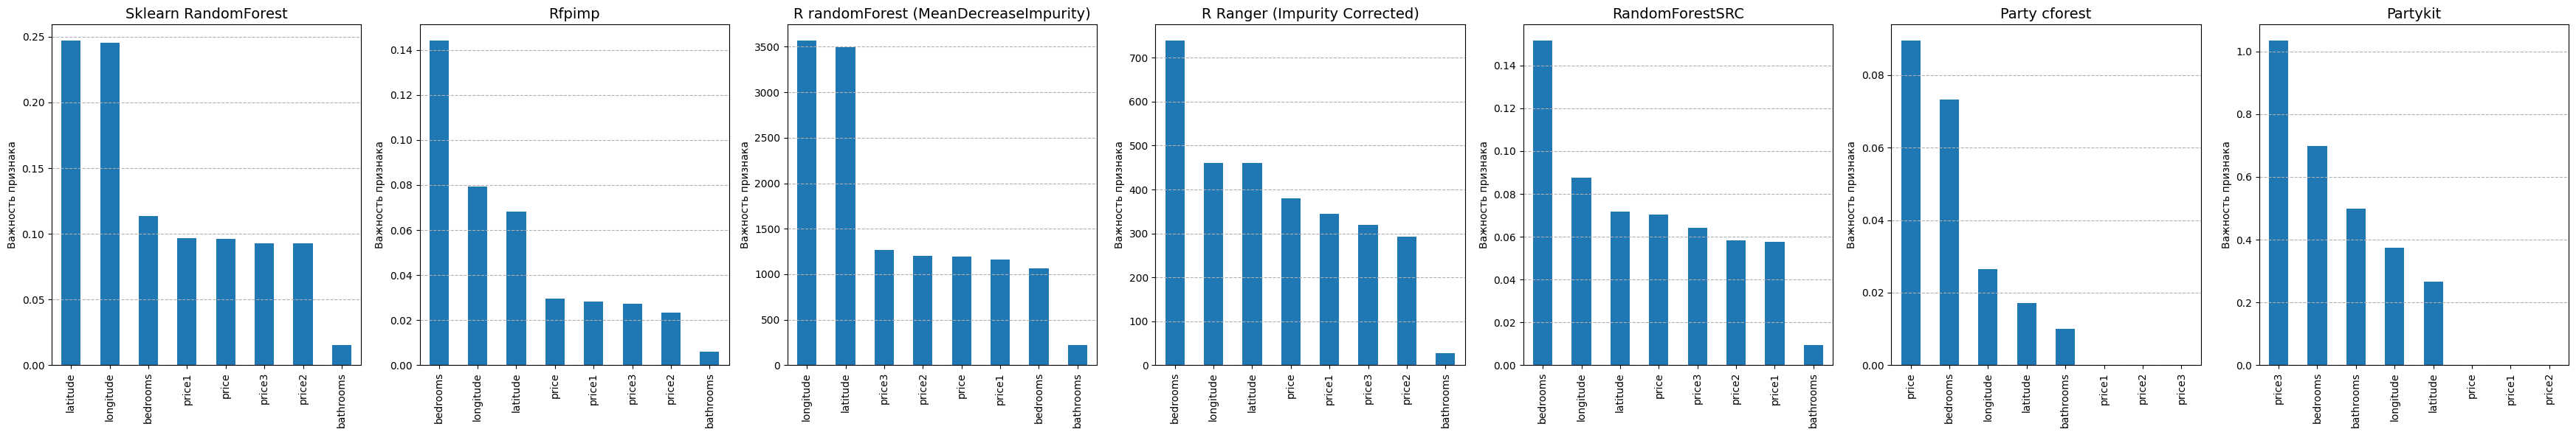

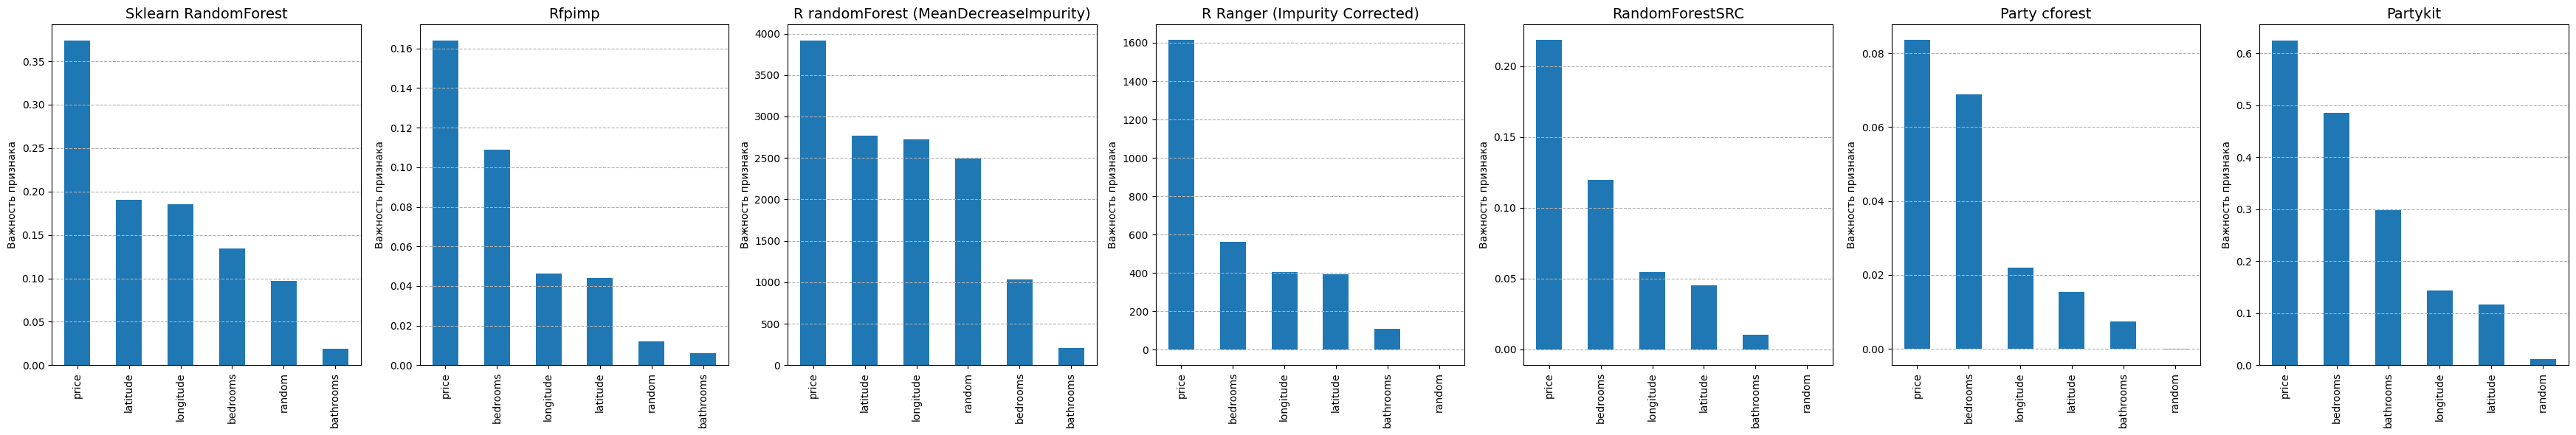

In [62]:
# 1. Собираем все ваши списки в один общий контейнер
raw_lists = [
    importance_series_list_1, 
    importance_series_list_2, 
    importance_series_list_3, 
    importance_series_list_4
]

titles_list = ['Sklearn RandomForest', 'Rfpimp', 'R randomForest (MeanDecreaseImpurity)',
               'R Ranger (Impurity Corrected)', 'RandomForestSRC', 'Party cforest', 'Partykit']

for i in raw_lists:
    picture(i, titles_list)
